# Deriving the area under curve with different spans
# (Simpson's rule alternative)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap as LSCm
# from scipy.interpolate import spline 
# spline is deprecated in scipy 0.19.0, use BSpline class instead.
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d

# from scipy.interpolate import griddata
# from scipy.signal import savgol_filter
# from scipy import integrate

from NesrHydrusAnalyst import *

In [2]:
data = np.array([[0, 3.6], [25, 5.], [50, 6.5], [75, 5.5], [100, 7.3],
                 [125, 6.0], [150, 4.0]])
data

array([[0.000, 3.600],
       [25.000, 5.000],
       [50.000, 6.500],
       [75.000, 5.500],
       [100.000, 7.300],
       [125.000, 6.000],
       [150.000, 4.000]])

In [14]:
# calculate area by the original simpson's rule
h=data[1, 0]-data[0, 0]
 
borders = data[0, 1]+data[-1, 1]
odd_rows = data[::2,1][1:-1]
even_rows = data[1::2,1]
area_simp = h/3*(borders + odd_rows.sum() * 2 + even_rows.sum() * 4)
area_simp

843.3333333333334

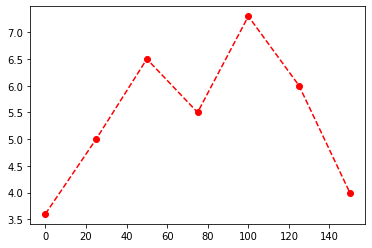

In [22]:
# Direct dotted line 
X, Y = data[:,0], data[:,1]
plt.plot(X, Y, 'ro--')

## Graphing The results

### From Stackoverflow 1

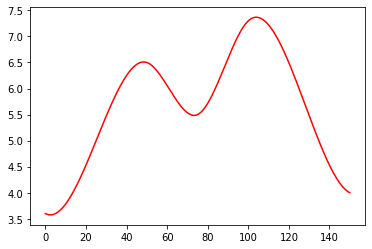

In [37]:
# Smooth curve https://stackoverflow.com/a/5284038/5820024

xnew = np.linspace(X.min(), X.max(), 300)

spl = make_interp_spline(X, Y, k=3)  # type: BSpline

power_smooth = spl(xnew)

plt.plot(xnew, power_smooth, 'r-')

### From Stackoverflow 2

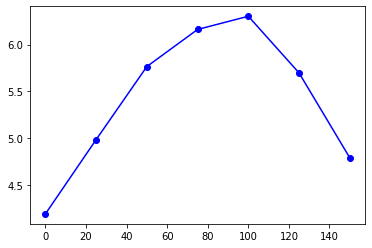

In [40]:
# Very Bad
ysmoothed = gaussian_filter1d(Y, sigma=1)
plt.plot(X, ysmoothed, 'bo-')

### Trials from Scipy examples

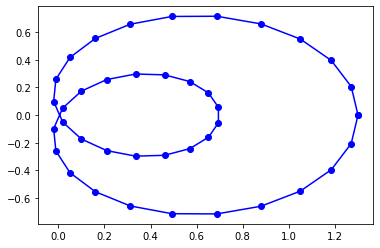

In [32]:
phi = np.linspace(0, 2.*np.pi, 40)
r = 0.3 + np.cos(phi)
x, y = r*np.cos(phi), r*np.sin(phi) 
plt.plot(x, y, 'bo-');

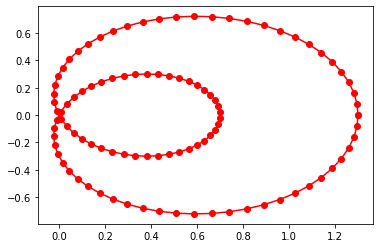

In [41]:
# Build an interpolating curve, parameterizing it by the angle
# from scipy.interpolate import make_interp_spline
spl = make_interp_spline(phi, np.c_[x, y])

# Evaluate the interpolant on a finer grid (note that we transpose 
# the result to unpack it into a pair of x- and y-arrays)
phi_new = np.linspace(0, 2.*np.pi, 100)
x_new, y_new = spl(phi_new).T
plt.plot(x_new, y_new, 'ro-');

### Back to our data using this method

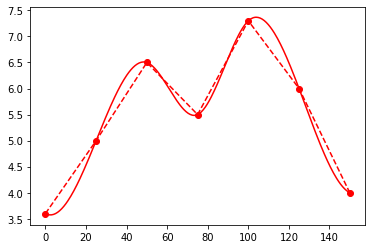

In [44]:
# Build an interpolating curve, parameterizing it by the angle
# from scipy.interpolate import make_interp_spline
spl = make_interp_spline(X, np.c_[X, Y])

# Evaluate the interpolant on a finer grid (note that we transpose 
# the result to unpack it into a pair of x- and y-arrays)
phi_new = np.linspace(X.min(), X.max(), 300)
x_new, y_new = spl(phi_new).T
plt.plot(X, Y, 'ro--')
plt.plot(x_new, y_new, 'r-');

## Filling the area under curve
https://stackoverflow.com/a/30580669/5820024

ValueError: operands could not be broadcast together with shapes (600,) (300,) 

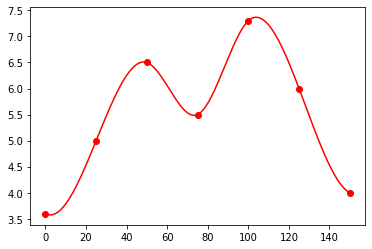

In [59]:

section = np.arange(0, 150, 0.5)
plt.plot(X, Y, 'ro')
plt.plot(x_new, y_new, 'r-');
plt.fill_between(section,y_new, alpha=0.1, color='r')